# Tutorial 2: High order pathology for the Stiffness matrix

In this example, we show the dependency of the **stiffness** symbol with respect to the spline degree in 1d.


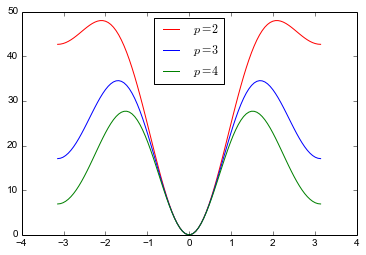

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from gelato.expression import glt_symbol
from gelato.expression import glt_lambdify
from numpy import linspace, pi

colors = ["r", "b", "g", "y", "m", "k", "c"]
for i,p in enumerate(range(2, 5)):
    
    # ... create a glt symbol from a string without evaluation
    expr = glt_symbol("Ni_x * Nj_x", \
                      dim=1, \
                      discretization={"n_elements": [32], "degrees": [p]}, \
                      evaluate=True)
    # ...
    
    # ...
    f = glt_lambdify(expr, dim=1)
    
    nx = 100
    x = linspace(  0, 1, nx)
    t = linspace(-pi,pi, nx)
    w = f(x,t)
    plt.plot(t, w.real, "-"+colors[i], label="$p=" + str(p) + "$")
    # ...
plt.legend(loc=9);

As expected, we notice the convergence to 0 at $| \theta | = \pi$.

Let's now devide the **stiffness** symbol by the **mass** symbol of degree $p-1$

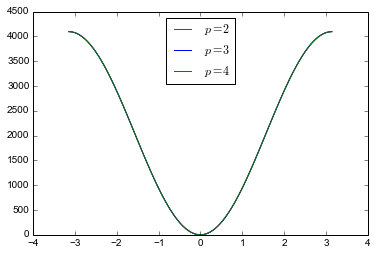

In [2]:
for i,p in enumerate(range(2, 5)):

    # ... create a glt symbol from a string without evaluation
    expr_s = glt_symbol("Ni_x * Nj_x", 
                        dim=1, 
                        discretization={"n_elements": [32], "degrees": [p]}, 
                        evaluate=True)
    # ...
    
    # ... create a glt symbol from a string without evaluation
    expr_m = glt_symbol("Ni * Nj", 
                        dim=1, 
                        discretization={"n_elements": [32], "degrees": [p-1]}, 
                        evaluate=True)
    # ...
       
    # ...
    f_s = glt_lambdify(expr_s, dim=1)
    f_m = glt_lambdify(expr_m, dim=1)
    
    nx = 100
    x = linspace(  0, 1, nx)
    t = linspace(-pi,pi, nx)
    w = f_s(x,t) / f_m(x,t)
    plt.plot(t, w.real, "-"+colors[i], label="$p=" + str(p) + "$")
    # ...
plt.legend(loc=9);

In [31]:
from sympy import Symbol
from IPython.display import Math
from gelato.printing.latex import glt_latex
from gelato.expression import glt_symbol

# ...
t1 = Symbol("t1")
degree = 2
# ...

# ... create a glt symbol from a string without evaluation
expr_m = glt_symbol("Ni_0 * Nj_0", \
                  dim=1, \
                  discretization={"n_elements": [1], "degrees": [degree]}, \
                  evaluate=True)
# ...

# ... create a glt symbol from a string without evaluation
expr_s = glt_symbol("Ni_x * Nj_x", \
                  dim=1, \
                  discretization={"n_elements": [1], "degrees": [degree]}, \
                  evaluate=True)
# ...

# ... create a glt symbol from a string without evaluation
expr_a = glt_symbol("Ni_x * Nj_0", \
                  dim=1, \
                  discretization={"n_elements": [1], "degrees": [degree]}, \
                  evaluate=True)
# ...

# ...
def to_latex(expr):
    m = Symbol("m")
    N = Symbol("N")
    pi = Symbol("pi")
    return glt_latex(expr.subs({t1: 2 * pi * m / N}))
# ...

In [32]:
Math(to_latex(expr_s))

<IPython.core.display.Math object>

In [33]:
Math(to_latex(expr_m))

<IPython.core.display.Math object>

In [34]:
Math(to_latex(expr_a))

<IPython.core.display.Math object>

In [40]:
Math(to_latex(expr_m.series(t1,0,8)))

<IPython.core.display.Math object>

In [41]:
Math(to_latex(expr_s.series(t1,0,8)))

<IPython.core.display.Math object>

In [42]:
Math(to_latex(expr_a.series(t1,0,8)))

<IPython.core.display.Math object>